For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [281]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [282]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

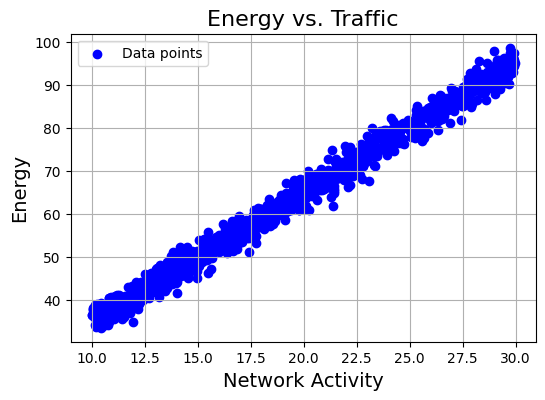

In [283]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

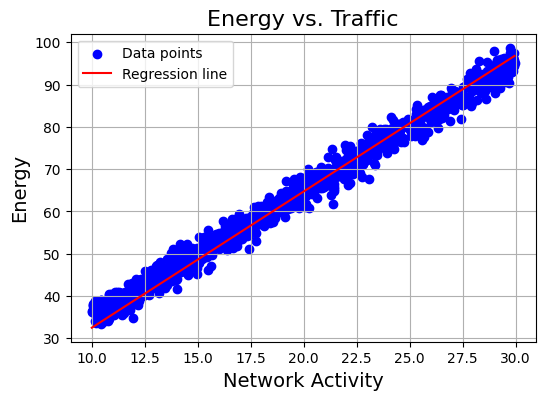

In [284]:

# Load data
data = pd.read_csv('mission1.csv')
X = data['Net_Activity']
y = data['Energy']

# Fitting data
lr = LinearRegression()
lr.fit(X, y)

#Predicting
prediction = lr.predict(X)

#Sorting
X_sorted = np.sort(X)
y_sorted_pred = np.sort(prediction)

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(X_sorted, y_sorted_pred, color='red', label='Regression line')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

In [285]:
print(f"The y2 is {y_sorted_pred[999]} and the y1 is {y_sorted_pred[0]}.")
print(f"The x2 is {X_sorted[999]} and the x1 is {X_sorted[0]}.")
print(f"The step is {(y_sorted_pred[999]-y_sorted_pred[0])/(X_sorted[999]-X_sorted[0])}.")

The y2 is 96.79415776094442 and the y1 is 32.4745745116192.
The x2 is 29.95146341578984 and the x1 is 10.003399904397227.
The step is 3.224352239132957.


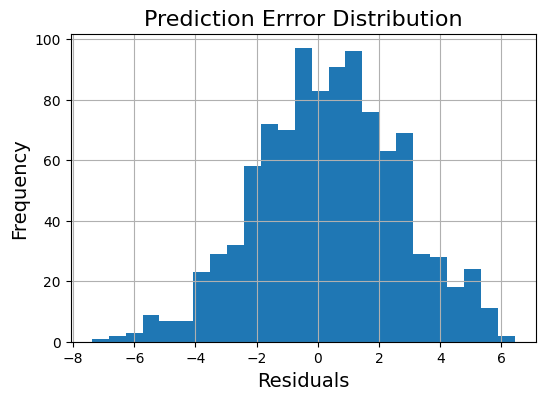

In [286]:
plt.figure(figsize=(6, 4))
plt.hist(y-prediction, bins=25)
plt.grid(True)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Prediction Errror Distribution', fontsize=16)
plt.show()

Discussion:

a) To find the formula we need to derive the step and bias of the linear function. 

Calculating the step: (y2-y1)/(x2-x1). Inserting numerical values gives the step (96.79-32.47)/(29.95-10.00) = 3.22.

The bias is equal to y1 = 32.47.

The formula is y = 3.22*x + 32.47

b) Plotted the prediction error distribution as a histogram to see the frequency of errors in the prediction model. Can observe from the graph that the frequency is higher the smaller the error is and the distribution is a normal distribution, which is positive. 

An unbiased estimator is an estimator which has an expected value equal to its true value. The prediction from the graph seems to be an unbiased estimator, due to the histogram being normalized without strong deviations and that the graph is centered around 0.

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [287]:
#Importing the logisitic regression implementation

from logistic_regression import LogisticRegression

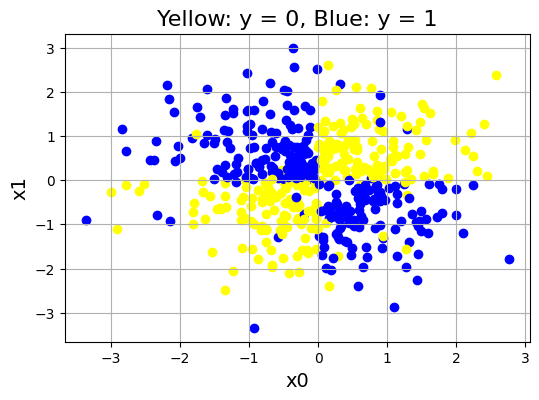

In [288]:
#Loading data

data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

x0_train = train['x0'].to_numpy()
x1_train = train['x1'].to_numpy()
y_train = train['y'].to_numpy()

# X = train[['x0', 'x1']].to_numpy()
# X0 = train[['x0']].to_numpy()
# X1 = train[['x1']].to_numpy()
# X_formatted = [X0, X1, X0*X1]
# print(X)

#Plotting raw data

plt.figure(figsize=(6, 4))

for i in range((len(y_train))):
    if y_train[i] == 1:
        plt.scatter(x0_train[i], x1_train[i], c='blue')
    else:
        plt.scatter(x0_train[i], x1_train[i], c='yellow')

plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('Yellow: y = 0, Blue: y = 1', fontsize=16)
plt.show()


In [289]:
# Initialize and train the model
log_reg_OG = LogisticRegression()
log_reg_OG.fit(train, False)

log_reg_formatted = LogisticRegression()
log_reg_formatted.fit(train, True)

# Make predictions
predictions = log_reg_OG.predict(test, False)
predictions_formatted = log_reg_formatted.predict(test, True)

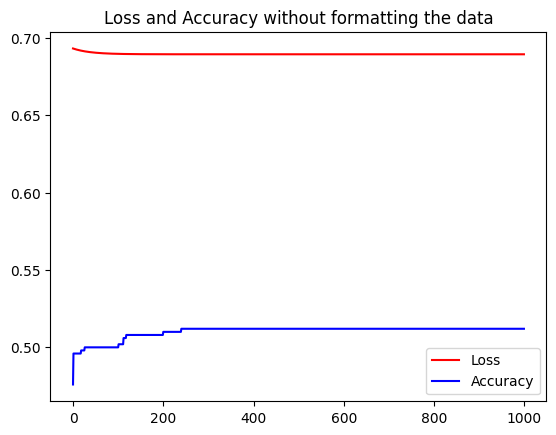

In [290]:
epoch_list = np.arange(0, 1000, 1)
plt.plot(epoch_list, log_reg_OG.losses, c='red', label="Loss")
plt.plot(epoch_list, log_reg_OG.train_accuracies, c='blue', label="Accuracy")
plt.title('Loss and Accuracy without formatting the data')
plt.legend()
plt.show()

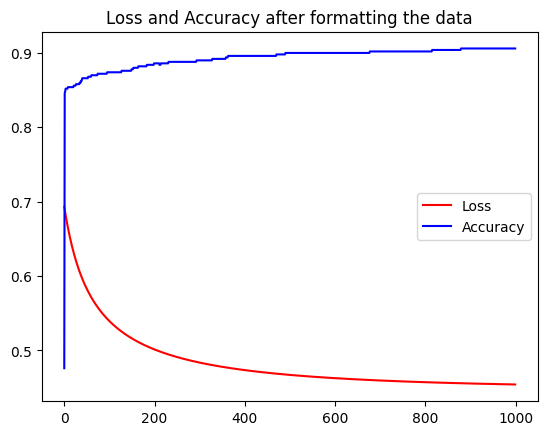

The accuracy after training the formatted data is 0.906.


In [291]:
epoch_list2 = np.arange(0, 1000, 1)
plt.plot(epoch_list2, log_reg_formatted.losses, c='red', label="Loss")
plt.plot(epoch_list2, log_reg_formatted.train_accuracies, c='blue', label="Accuracy")
plt.title('Loss and Accuracy after formatting the data')
plt.legend()
plt.show()

print(f'The accuracy after training the formatted data is {log_reg_formatted.train_accuracies[-1]}.')

Discussion Part 1:

a) The initial performance was poor, because as you can see in the first graph, where the data points are shown, the data was split into the four quadrants. Most of the data points that were in the same class appeared to be in diagonal quadrants (1 and 3 versus 2 and 4), aside from a few outliers. This made the logistic regression accurate, as it could not accurately classify the data.

I engineered a third feature: X0*X1: The logic behind this was that most of the blue datapoints had only either X0 or X1 negative, which would make X0*X1 always negative. On the other hand, for the yellow datapoints X0 and X1 were both either positive or negative, meaning X0*X1 would always be positive.

Training with this third feature successfully improved the training model and increased the accuracy.

b) Logistic regression assumes the log-odds are linear in the features: w*x + b. The model will not learn connections that are not included as features, they must be added so that they can be learned. With engineering of the features the boundry will be linear in the new feature-room, but is hyperbolic in the original (X0, X1) room/graph.

In [292]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def build_model(train, formatting):
    if formatting:
        X_formatted = train[['x0', 'x1']].to_numpy()
        X0 = train[['x0']].to_numpy()
        X1 = train[['x1']].to_numpy()

        X_formatted = np.hstack((X_formatted, X0*X1))
        y = train['y'].to_numpy()

        return X_formatted, y
    else:
        X = train[['x0', 'x1']].to_numpy()
        y = train['y'].to_numpy()
        return X, y
    
x_train_DT, y_train_DT = build_model(train, True)
x_test_DT, y_test_DT = build_model(test, True)

DT = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=0)
DT.fit(x_train_DT, y_train_DT)

DT_prob = DT.predict_proba(x_test_DT)[:, 1]
DT_pred = (DT_prob >= 0.5).astype(int)
print("DT training accuracy:",
      accuracy_score(y_train_DT, DT.predict(x_train_DT)))
print("DT test accuracy:",
      accuracy_score(y_test_DT, DT_pred))

DT training accuracy: 0.954
DT test accuracy: 0.936


Discussion Part 2:

c) Yes, the problem can besolves using the DecisionTreeClassifier from the sklearn library. This makes sense, because trees can naturally make non-linear and axis aligned regions to capture connections. With only max depth = 4 and minimum samples per leaf node = 5, the test accuracy was above 93%!

d) The ROC curve can be seen below.

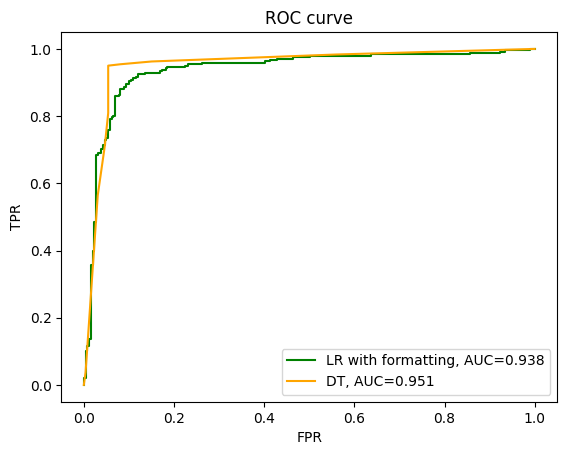

In [293]:
from sklearn.metrics import roc_curve, auc

x_test, y_test = build_model(test, True)
lin_model = np.matmul(x_test, log_reg_formatted.weights) + log_reg_formatted.bias
LR_prob = 1.0 / (1.0 + np.exp(-lin_model))

FPR_LR, TPR_LR, _ = roc_curve(y_test_DT, LR_prob)
FPR_DT, TPR_DT, _ = roc_curve(y_test_DT, DT_prob)
AUC_LR = auc(FPR_LR, TPR_LR)
AUC_DT = auc(FPR_DT, TPR_DT)

plt.figure()
plt.plot(FPR_LR, TPR_LR, color='green', label=f'LR with formatting, AUC={AUC_LR:.3f}')
plt.plot(FPR_DT, TPR_DT, color='orange', label=f'DT, AUC={AUC_DT:.3f}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [294]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [295]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

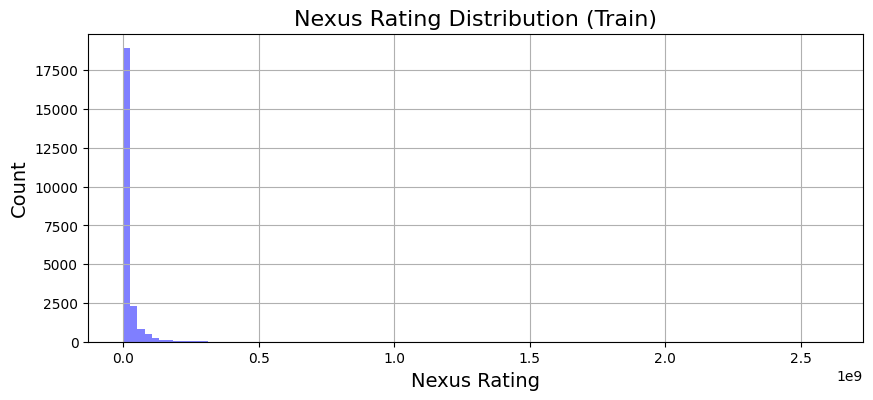

In [296]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [297]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [298]:
# Example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)

RMSLE:  4.203250078450383
Required RMSLE:  0.294
